In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#Data Cleaning

##Missing Value Analysis

In [3]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


Finding percentage missing values

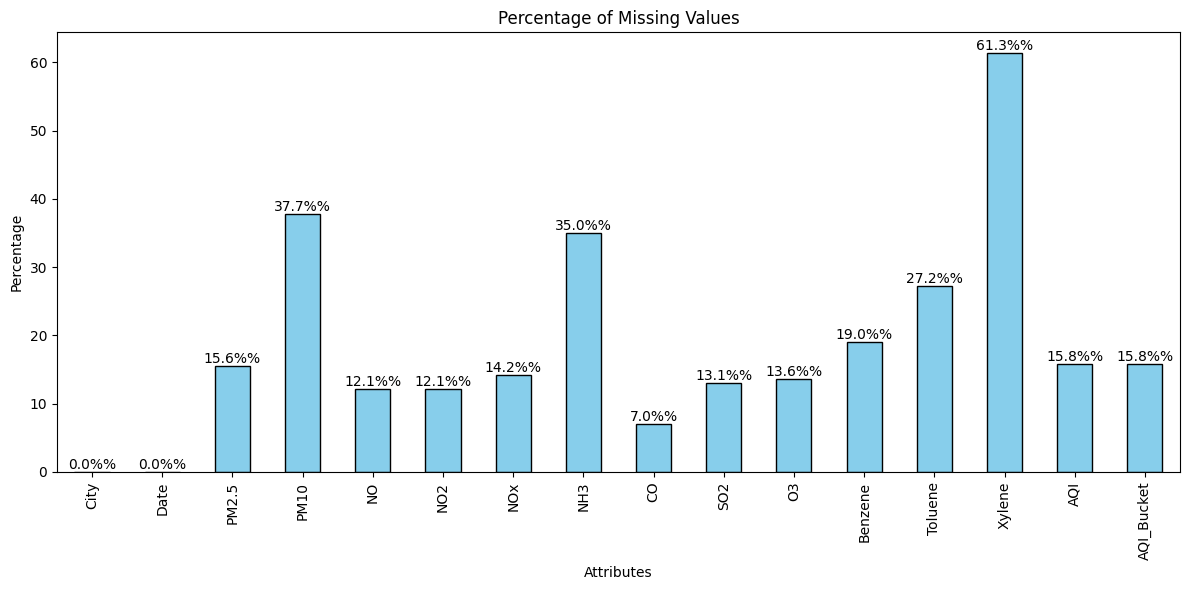

In [4]:
instances = df.shape[0]
missing_values_percentage = round((df.isnull().sum() / instances) * 100,2)

#missing values out of all instances
plt.figure(figsize=(12,6))
missing_values_percentage.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Percentage of Missing Values')
plt.xlabel('Attributes')
plt.ylabel('Percentage')

for i , value in enumerate(missing_values_percentage):
    plt.text(i,value,f'{value:.1f}%' + '%',ha='center',va='bottom')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


###Missing Value Treatment

Removing Xylene <br>
removing missing AQI and AQI_Bucket

In [5]:
#counting the instances in each column
#display instances count for each column of df


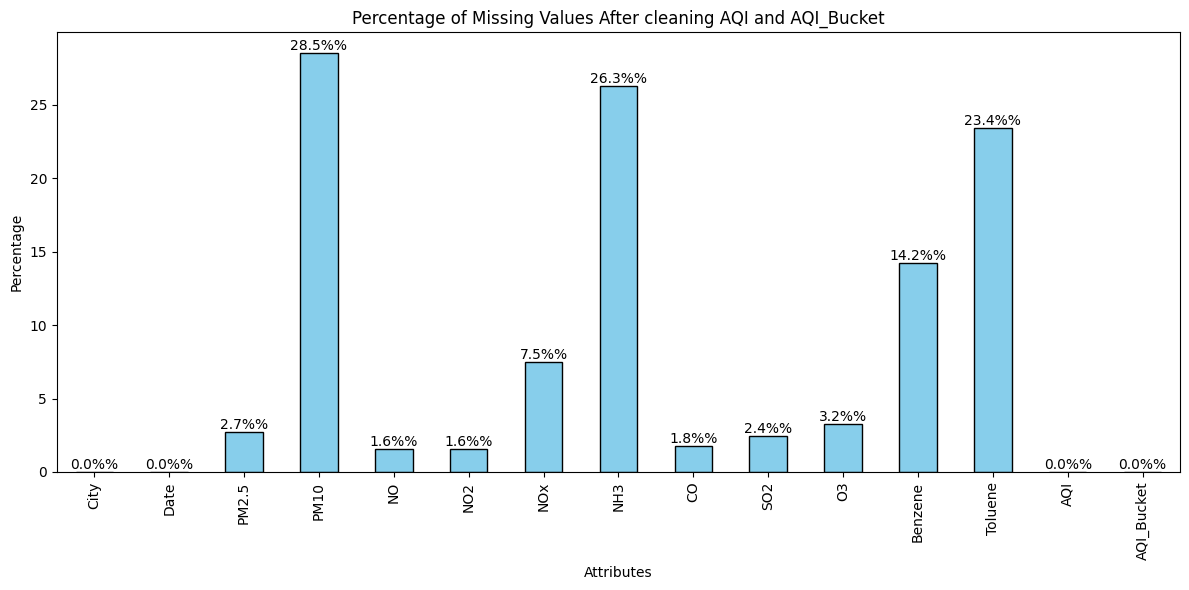

In [6]:
# df2 = df.copy()
df.drop('Xylene',axis=1,inplace=True)
df.dropna(subset=['AQI','AQI_Bucket'],inplace=True)

#print("number of instances", df.count(),"\nmissing values", df.isnull().sum())
instances = df.shape[0]
missing_values_percentage = round((df.isnull().sum() / instances) * 100,2)

#missing values out of all instances
plt.figure(figsize=(12,6))
missing_values_percentage.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Percentage of Missing Values After cleaning AQI and AQI_Bucket')
plt.xlabel('Attributes')
plt.ylabel('Percentage')

for i , value in enumerate(missing_values_percentage):
    plt.text(i,value,f'{value:.1f}%' + '%',ha='center',va='bottom')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####Imputation

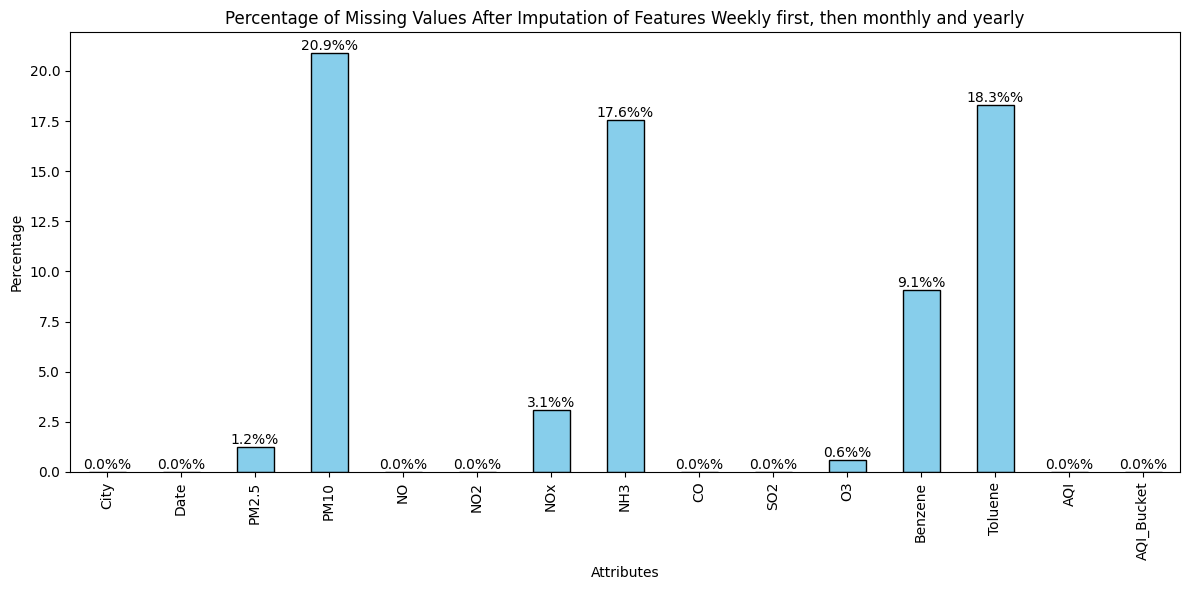

In [7]:
#Imputing the missing feature columns with weekly average of each feature
#Finding weekly average of each feature


#First find the weeks
# then find the weekly avg by grouping
# then merge to original data by df.merge

df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# List of features to impute
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

#Impute by Weekly Average
weekly_avg = df.groupby(['City', 'Year', 'Week'])[features].transform('mean')
df[features] = df[features].fillna(weekly_avg)

#Impute remaining by Monthly Average
monthly_avg = df.groupby(['City', 'Year', 'Month'])[features].transform('mean')
df[features] = df[features].fillna(monthly_avg)

#Impute remaining by Yearly Average
yearly_avg = df.groupby(['City', 'Year'])[features].transform('mean')
df[features] = df[features].fillna(yearly_avg)


df.drop(columns=['Week', 'Month', 'Year'], inplace=True)

#Plot the missing percentage

instances = df.shape[0]
missing_values_percentage = round((df.isnull().sum() / instances) * 100,2)


plt.figure(figsize=(12,6))
missing_values_percentage.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Percentage of Missing Values After Imputation of Features Weekly first, then monthly and yearly')
plt.xlabel('Attributes')
plt.ylabel('Percentage')

for i , value in enumerate(missing_values_percentage):
    plt.text(i,value,f'{value:.1f}%' + '%',ha='center',va='bottom')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Imputing these remaining values might introduce bias and noise in data so dropping the remaining missing values

DROPPING REMAINING MISSING VALUES

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


##Data Distribtion Analysis

In [9]:
df['City'].unique()

array(['Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Chandigarh',
       'Chennai', 'Coimbatore', 'Delhi', 'Gurugram', 'Hyderabad',
       'Jaipur', 'Kolkata', 'Patna', 'Shillong', 'Talcher',
       'Visakhapatnam'], dtype=object)

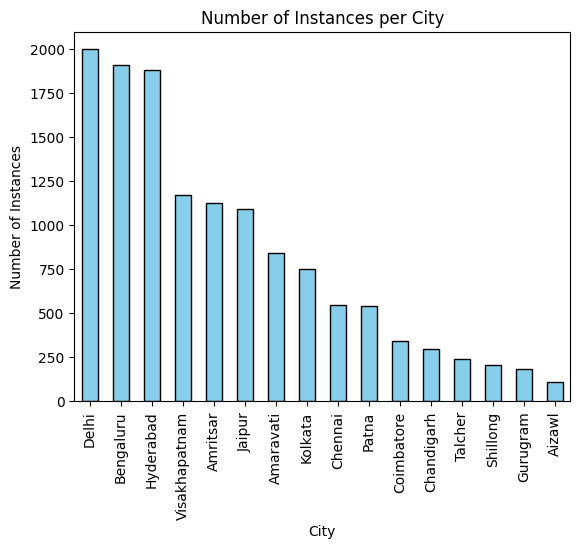

In [10]:
data_per_city = df['City'].value_counts()
data_per_city.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Number of Instances per City')
plt.xlabel('City')
plt.ylabel('Number of Instances')
# plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

Cities with data instances less than 750 are not suitable for predictions and overall trend.

Text(0.5, 0, 'Prediction Class')

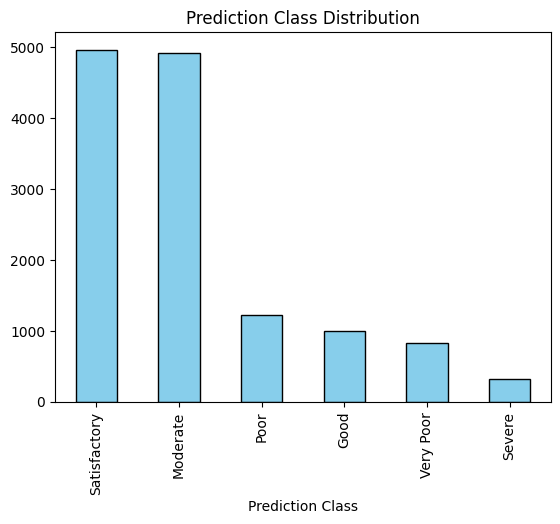

In [11]:
#Prediction class
#plotting the perdiction class distribution plot
prediction_class = df['AQI_Bucket'].value_counts()
prediction_class.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Prediction Class Distribution')
plt.xlabel('Prediction Class')

In [12]:
prediction_class

,count
AQI_Bucket,
Satisfactory,4970
Moderate,4916
Poor,1221
Good,1001
Very Poor,821
Severe,317


# Model Selection
Since there is class imbalance, there is need of a model that can handle it.<br>
**

**Models Used:**<br>
- Xgboost <br>
- Decision Trees <br>
- Naive Bayes <br>


Benchmark models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [14]:
X = df.drop(['AQI', 'AQI_Bucket','Date'], axis=1)
y = df['AQI_Bucket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


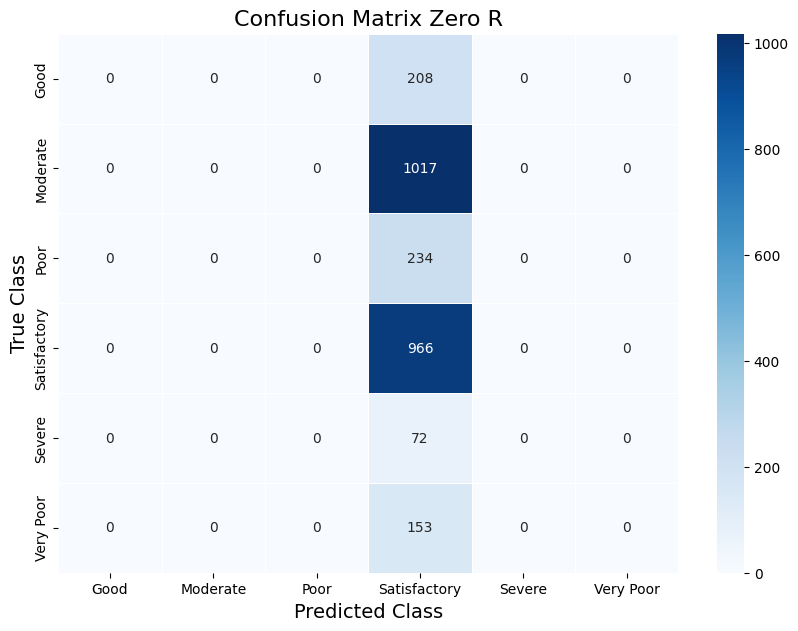

In [15]:
class ZeroR:
    def fit(self, y):
        self.majority_class = y.mode()[0]

    def predict(self, X):
        return [self.majority_class] * len(X)
class OneR:
    def fit(self, X, y):
        self.rules = {}
        self.errors = {}
        self.features = X.columns

        for feature in self.features:

            contingency = pd.crosstab(X[feature], y)

            feature_rules = contingency.idxmax(axis=1)
            error_counts = contingency.sum(axis=1) - contingency.max(axis=1)
            total_errors = error_counts.sum()
            self.rules[feature] = feature_rules
            self.errors[feature] = total_errors

        # Select the best feature based on the minimum error
        self.best_feature = min(self.errors, key=self.errors.get)

    def predict(self, X):
        # Create a Series for the predictions using the best feature's rules
        predictions = []
        for value in X[self.best_feature]:

            if value in self.rules[self.best_feature].index:
                predictions.append(self.rules[self.best_feature][value])
            else:

                predictions.append(self.rules[self.best_feature].mode()[0])  # Fallback to the most common class
        return pd.Series(predictions, index=X.index)

def confusion_matrix_custom(y_true, y_pred,title):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)


    plt.title(f'Confusion Matrix {title}', fontsize=16)
    plt.xlabel('Predicted Class', fontsize=14)
    plt.ylabel('True Class', fontsize=14)

    # Show the plot
    plt.show()
def classification_report_custom(y_true, y_pred,title):
    report = classification_report(y_test, y_pred, output_dict=True)

    # Convert the report to a DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :], annot=True, fmt='.2f', cmap='Blues', cbar=True)

    plt.title(f'Classification Report {title}', fontsize=16)
    plt.ylabel('Classes', fontsize=14)
    plt.xlabel('Metrics', fontsize=14)

    plt.show()


zeroR_model = ZeroR()
zeroR_model.fit(y_train)
y_pred_zeroR = zeroR_model.predict(X_test)
classification_report_zeroR =  classification_report(y_test, y_pred_zeroR)
confusion_matrix_zeroR = confusion_matrix(y_test, y_pred_zeroR)

confusion_matrix_custom(y_test, y_pred_zeroR,"Zero R")



# Train and evaluate OneR
oneR_model = OneR()
oneR_model.fit(X_train, y_train)
y_pred_oneR = oneR_model.predict(X_test)
classification_report_oneR = classification_report(y_test, y_pred_oneR)
confusion_matrix_oneR = confusion_matrix(y_test, y_pred_oneR)






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


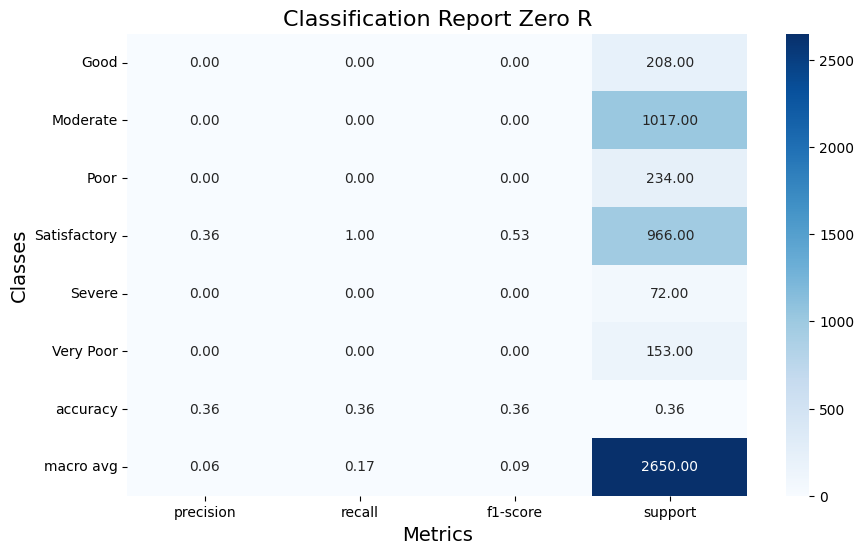

In [16]:
classification_report_custom(y_test, y_pred_zeroR,"Zero R")

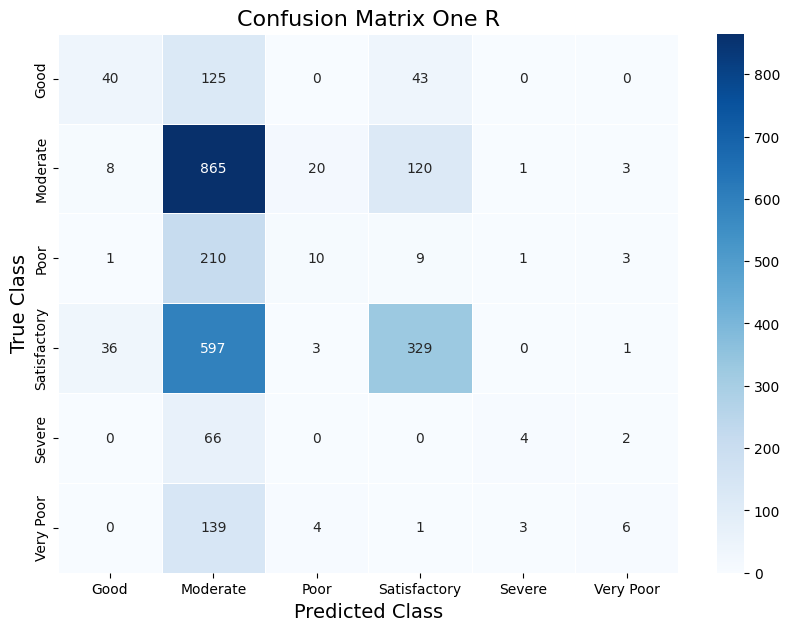

In [17]:
confusion_matrix_custom(y_test, y_pred_oneR,"One R")


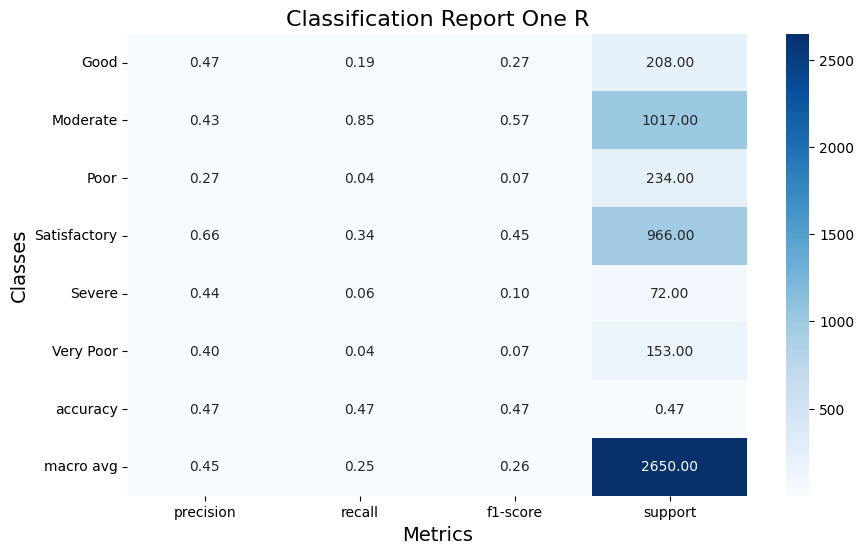

In [18]:
classification_report_custom(y_test, y_pred_oneR,"One R")

##XGboost

**Preprocessing**

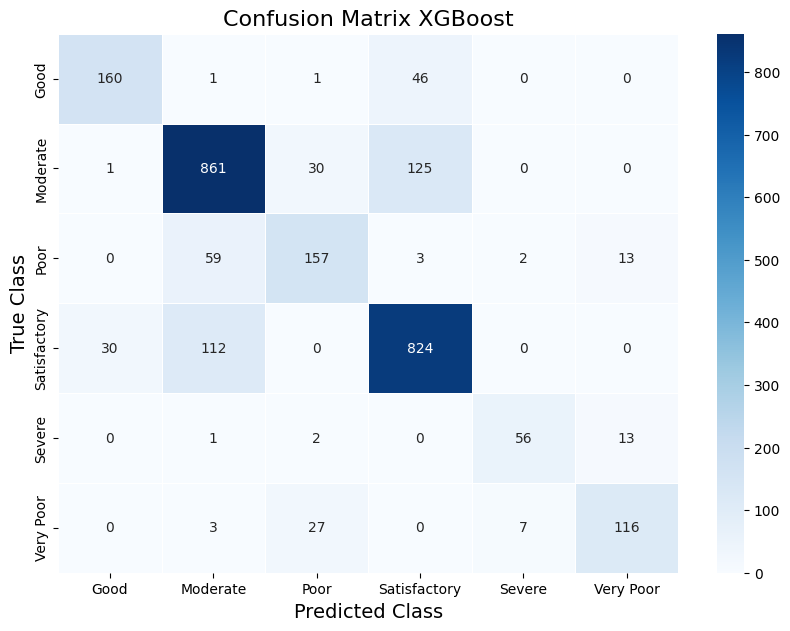

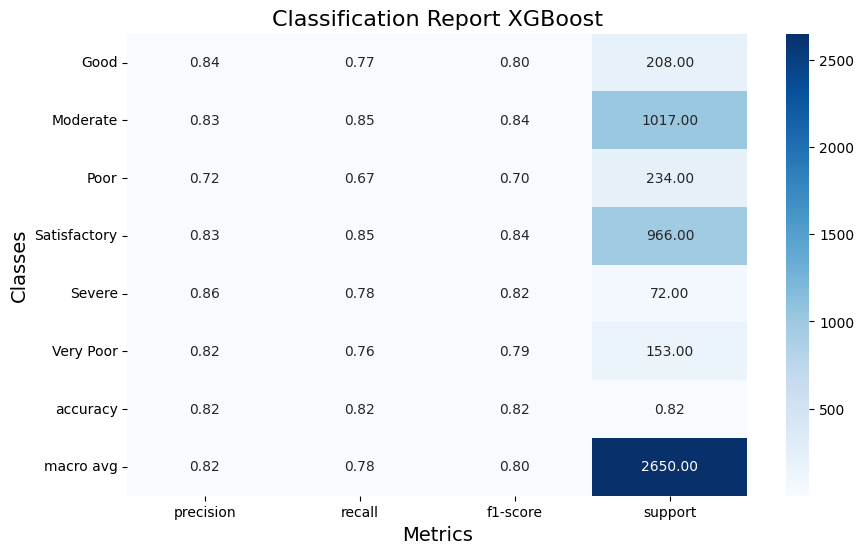

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier

# Prepare data
X = df.drop(['AQI', 'AQI_Bucket', 'Date'], axis=1)
y = df['AQI_Bucket']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=['City'])
X_test_encoded = pd.get_dummies(X_test, columns=['City'])

# Align columns of train and test data
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Instantiate XGBoost model
num_classes = len(label_encoder.classes_)
model = XGBClassifier(objective='multi:softmax', num_class=num_classes, eval_metric='mlogloss')

# Train the model
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred_encoded = model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test = label_encoder.inverse_transform(y_test)

classification_report_xgboost = classification_report(y_test, y_pred)
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred)
# Display confusion matrix and classification report
confusion_matrix_custom(y_test, y_pred,"XGBoost")
classification_report_custom(y_test, y_pred, "XGBoost")

In [20]:
classification_report1 = classification_report(y_test, y_pred)

print(classification_report1)

              precision    recall  f1-score   support

        Good       0.84      0.77      0.80       208
    Moderate       0.83      0.85      0.84      1017
        Poor       0.72      0.67      0.70       234
Satisfactory       0.83      0.85      0.84       966
      Severe       0.86      0.78      0.82        72
   Very Poor       0.82      0.76      0.79       153

    accuracy                           0.82      2650
   macro avg       0.82      0.78      0.80      2650
weighted avg       0.82      0.82      0.82      2650



In [21]:
y_pred.shape

(2650,)

In [22]:
y_test

array(['Good', 'Moderate', 'Satisfactory', ..., 'Satisfactory',
       'Moderate', 'Moderate'], dtype=object)

Random Forest Results:


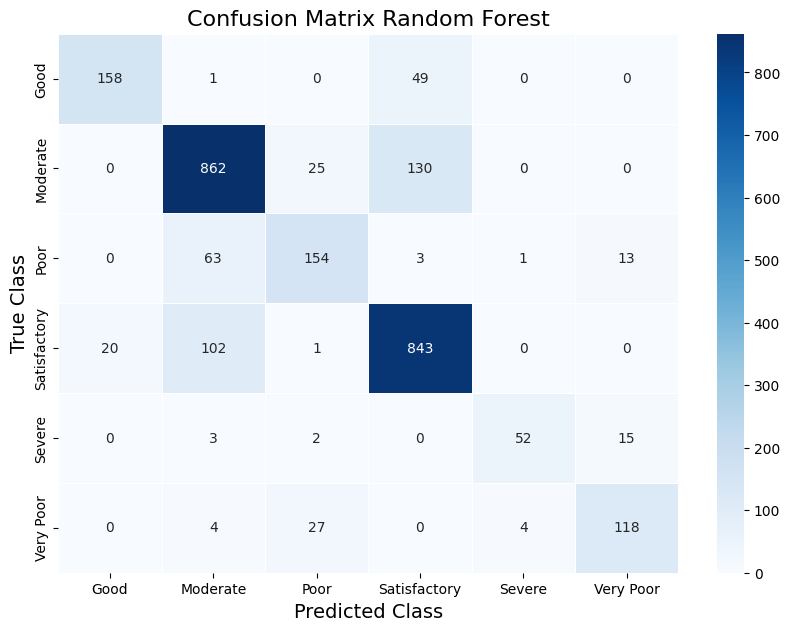

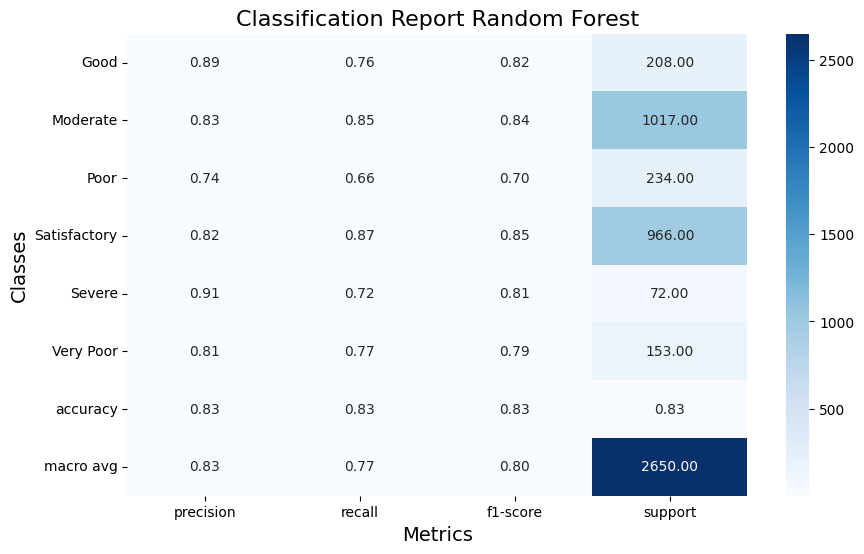

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_encoded, y_train)
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf_labels)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf_labels)
# Display confusion matrix and classification report for Random Forest
print("Random Forest Results:")
confusion_matrix_custom(y_test, y_pred_rf_labels, "Random Forest")
classification_report_custom(y_test, y_pred_rf_labels, "Random Forest")

Naive Bayes Results:


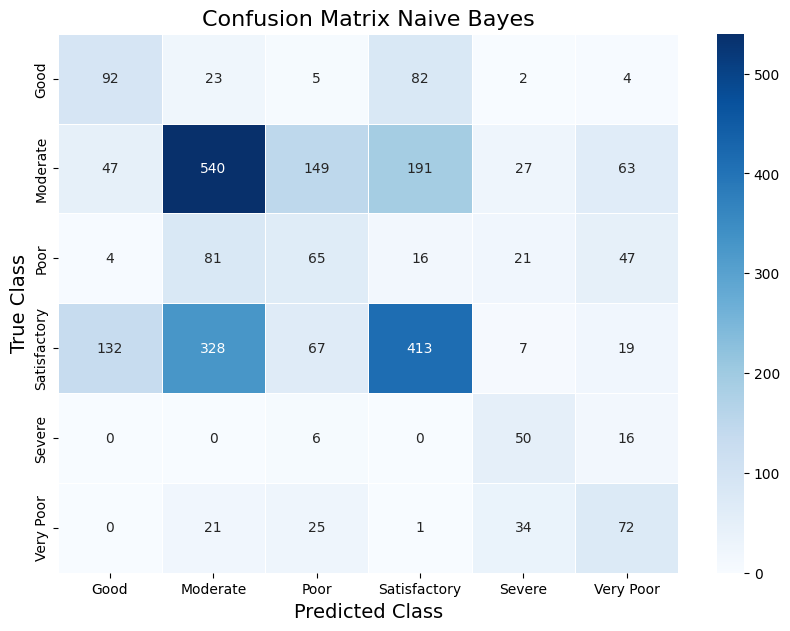

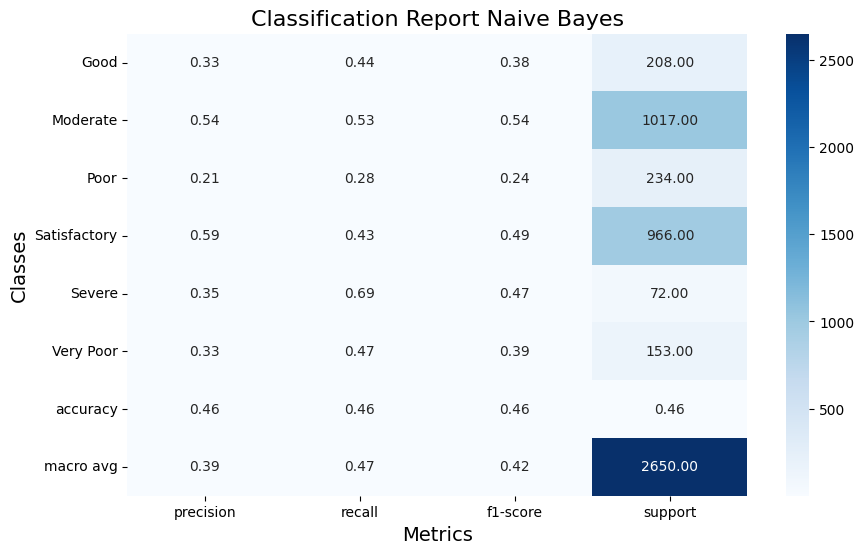

In [18]:
nb_model = MultinomialNB()
nb_model.fit(X_train_encoded, y_train)
y_pred_nb = nb_model.predict(X_test_encoded)
y_pred_nb_labels = label_encoder.inverse_transform(y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb_labels)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb_labels)
# Display confusion matrix and classification report for Naive Bayes
print("Naive Bayes Results:")
confusion_matrix_custom(y_test, y_pred_nb_labels, "Naive Bayes")
classification_report_custom(y_test, y_pred_nb_labels, "Naive Bayes")

Best model appears to be XGboost

In [25]:
X_train.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
9608,Chennai,93.13,198.200000,11.81,13.01,24.79,17.81,0.980,5.460000,53.810000,0.000,2.570000
11165,Delhi,22.17,241.893333,21.08,18.10,3.98,28.73,0.000,22.272085,40.713492,0.360,0.000000
17173,Jaipur,60.48,136.560000,7.73,16.53,24.49,19.15,0.910,20.260000,45.350000,1.110,5.970000
10813,Delhi,42.84,75.190000,15.70,31.42,42.34,28.89,2.480,10.020000,67.170000,2.020,14.340000
4867,Bengaluru,22.79,86.430000,6.29,3.00,7.66,15.69,0.685,4.700000,38.063000,0.803,7.420875


In [20]:
#Benchmark reports
print("Zero R classification report\n", classification_report_zeroR)
print("One R classification report\n", classification_report_oneR)

Zero R classification report
               precision    recall  f1-score   support

        Good       0.00      0.00      0.00       208
    Moderate       0.00      0.00      0.00      1017
        Poor       0.00      0.00      0.00       234
Satisfactory       0.36      1.00      0.53       966
      Severe       0.00      0.00      0.00        72
   Very Poor       0.00      0.00      0.00       153

    accuracy                           0.36      2650
   macro avg       0.06      0.17      0.09      2650
weighted avg       0.13      0.36      0.19      2650

One R classification report
               precision    recall  f1-score   support

        Good       0.47      0.19      0.27       208
    Moderate       0.43      0.85      0.57      1017
        Poor       0.27      0.04      0.07       234
Satisfactory       0.66      0.34      0.45       966
      Severe       0.44      0.06      0.10        72
   Very Poor       0.40      0.04      0.07       153

    accuracy      

In [21]:
print("Xgboost classification report\n", classification_report_xgboost)
print("Random forest classifcation report\n", classification_report_rf)
print("Naive Bayes classifcation report\n", classification_report_nb)

Xgboost classification report
               precision    recall  f1-score   support

        Good       0.84      0.77      0.80       208
    Moderate       0.83      0.85      0.84      1017
        Poor       0.72      0.67      0.70       234
Satisfactory       0.83      0.85      0.84       966
      Severe       0.86      0.78      0.82        72
   Very Poor       0.82      0.76      0.79       153

    accuracy                           0.82      2650
   macro avg       0.82      0.78      0.80      2650
weighted avg       0.82      0.82      0.82      2650

Random forest classifcation report
               precision    recall  f1-score   support

        Good       0.89      0.76      0.82       208
    Moderate       0.83      0.85      0.84      1017
        Poor       0.74      0.66      0.70       234
Satisfactory       0.82      0.87      0.85       966
      Severe       0.91      0.72      0.81        72
   Very Poor       0.81      0.77      0.79       153

    accura

In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

X_train_encoded = pd.get_dummies(X_train, columns=['City'])
X_test_encoded = pd.get_dummies(X_test, columns=['City'])


X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


xgb_model = XGBClassifier(objective='multi:softmax', num_class=6, enable_categorical=True)


grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=6,
                                     num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.81521328803322


#Conclusion

XGBoost with weighted average provide reasonably good results 82% accuracy and 80% f1 score :
with <br>
learning rate = 0.1 <br>
max_Depth = 5 <br>
n_estimators = 100 <br>
